# Health Insurance Cross Sell Prediction: Identifying Potential Customers for Vehicle Insurance Conversion

The primary objective of this project is to assist insurance companies in optimizing their cross-selling approaches by identifying potential customers among their existing health insurance clientele interested in purchasing vehicle insurance. Cross-selling is a cornerstone tactic for insurers, amplifying revenue and fortifying customer retention.

# Module 1

## Data Exploration

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('insurance_dataset.csv')

# Display the first few rows of the dataset to understand its structure
df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,46048,Male,22,1,26.0,1,< 1 Year,No,27460.0,152.0,172,0
1,228395,Male,29,1,15.0,0,< 1 Year,Yes,28982.0,152.0,207,0
2,170449,Male,25,1,2.0,0,< 1 Year,No,25067.0,152.0,228,0
3,92900,Male,34,1,47.0,1,1-2 Year,Yes,2630.0,156.0,193,0
4,257877,Male,35,1,28.0,0,1-2 Year,Yes,40499.0,124.0,77,1


In [70]:
# Identifying and quantifying null values in the dataset
sumofnull = df.isnull().sum()
sumofnull


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [71]:
# Examining the data types of each column in the dataset
dtype = df.dtypes
dtype

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [72]:
# Generating descriptive statistics for the dataset
describe = df.describe()
describe


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,190360.481080,38.917040,0.998140,26.403980,0.456260,30651.202720,111.74360,154.520040,0.122780
std,110129.705102,15.547106,0.043088,13.228193,0.498088,16856.326189,54.29231,83.665823,0.328188
min,3.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.00000,10.000000,0.000000
25%,94695.500000,25.000000,1.000000,15.000000,0.000000,24555.000000,26.00000,82.000000,0.000000
50%,190046.000000,36.000000,1.000000,28.000000,0.000000,31748.000000,125.00000,155.000000,0.000000
75%,285516.250000,50.000000,1.000000,35.000000,1.000000,39476.000000,152.00000,227.000000,0.000000
max,381105.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.00000,299.000000,1.000000


In [73]:
# Calculating the count of unique values in the 'Response' column
target_counts = df['Response'].value_counts()
target_counts


0    43861
1     6139
Name: Response, dtype: int64

# Module 2

## Data Pre-Processing

In [74]:
# Identifying and counting the duplicate records in the dataset
duplicates = df.duplicated().sum()
duplicates

4

In [75]:
# Eliminating duplicate records from the dataset
df.drop_duplicates(inplace=True)

# Displaying the resulting DataFrame after removing duplicates
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,46048,Male,22,1,26.0,1,< 1 Year,No,27460.0,152.0,172,0
1,228395,Male,29,1,15.0,0,< 1 Year,Yes,28982.0,152.0,207,0
2,170449,Male,25,1,2.0,0,< 1 Year,No,25067.0,152.0,228,0
3,92900,Male,34,1,47.0,1,1-2 Year,Yes,2630.0,156.0,193,0
4,257877,Male,35,1,28.0,0,1-2 Year,Yes,40499.0,124.0,77,1


In [76]:
# Creating a copy of the DataFrame and removing the 'id' column
data = df.copy()
data.drop('id', axis=1, inplace=True)

# Showing the resulting DataFrame
data.head()


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,22,1,26.0,1,< 1 Year,No,27460.0,152.0,172,0
1,Male,29,1,15.0,0,< 1 Year,Yes,28982.0,152.0,207,0
2,Male,25,1,2.0,0,< 1 Year,No,25067.0,152.0,228,0
3,Male,34,1,47.0,1,1-2 Year,Yes,2630.0,156.0,193,0
4,Male,35,1,28.0,0,1-2 Year,Yes,40499.0,124.0,77,1


In [77]:
# Encoding categorical features in the dataset
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})
data['Vehicle_Damage'] = data['Vehicle_Damage'].replace({'Yes': 1, 'No': 0})
data['Vehicle_Age'] = data['Vehicle_Age'].replace({'< 1 Year': 1, '1-2 Year': 2, '> 2 Years': 3})

# Showing the DataFrame after the updates
data.head()


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,22,1,26.0,1,1,0,27460.0,152.0,172,0
1,1,29,1,15.0,0,1,1,28982.0,152.0,207,0
2,1,25,1,2.0,0,1,0,25067.0,152.0,228,0
3,1,34,1,47.0,1,2,1,2630.0,156.0,193,0
4,1,35,1,28.0,0,2,1,40499.0,124.0,77,1


In [78]:
# Reviewing the data types of each column in the transformed dataset
datatypes = data.dtypes
datatypes


Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

# Module 3

## Data Visualisation

Heatmap visualization provides a graphical representation of the correlation values between variables. Understanding these correlations is vital for identifying interdependencies and potential multicollinearity between features. This analysis assists in feature selection and model development for precise health insurance cross-selling predictions.

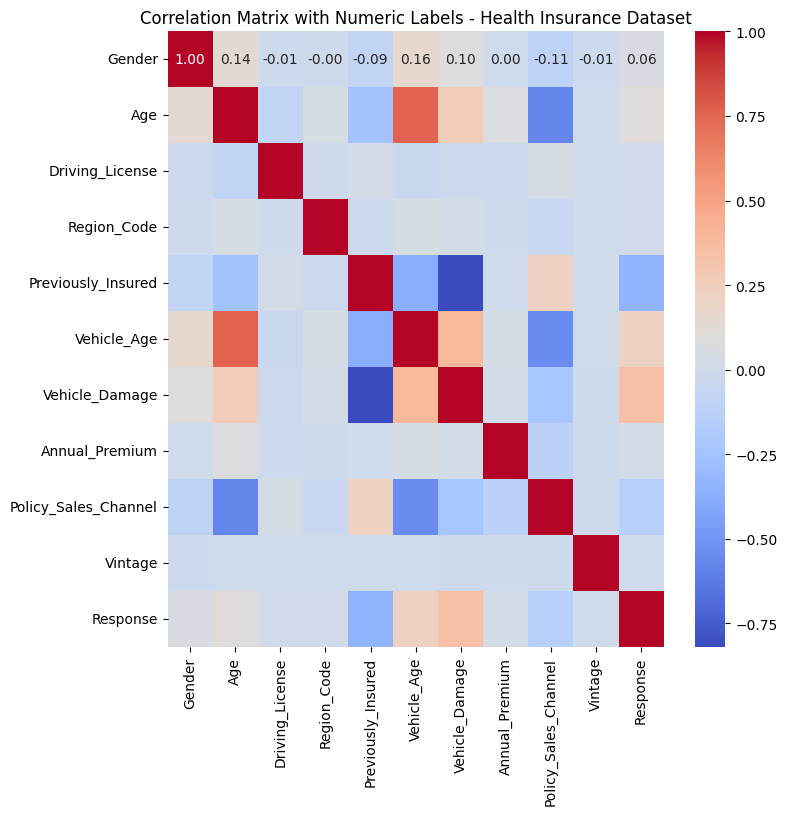

In [105]:
# Re-generating the heatmap with numeric labels
plt.figure(figsize=(8, 8))
sns.heatmap(corr_data, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix with Numeric Labels - Health Insurance Dataset")
plt.show()



This visualization presents a clear depiction of the class distribution, helping to understand the balance or imbalance between different response classes. Such visualizations are crucial for assessing the composition of the target variable and its potential impact on the modeling process

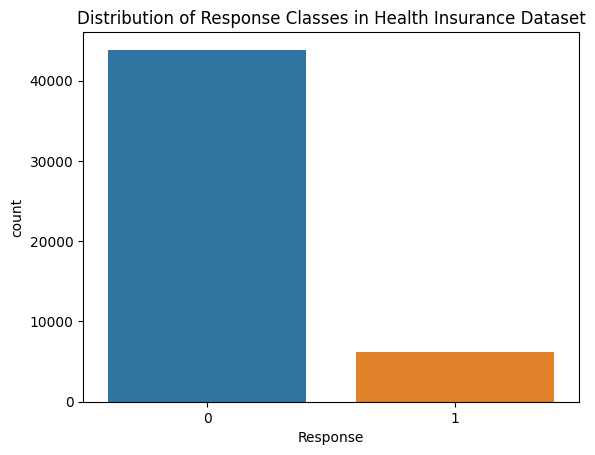

In [80]:
# Visualizing the distribution of the 'Response' variable
response_ax = sns.countplot(x='Response', data=data)
plt.title("Distribution of Response Classes in Health Insurance Dataset")
plt.show()


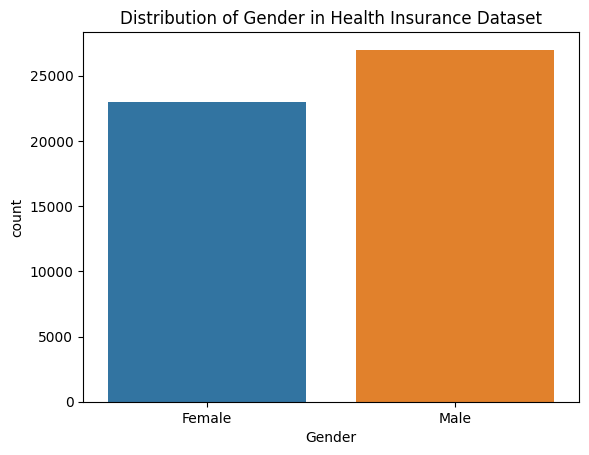

In [81]:
# Visualizing the distribution of the 'Gender' variable
gender_ax = sns.countplot(x='Gender', data=data)
plt.title("Distribution of Gender in Health Insurance Dataset")
plt.xticks([0, 1], ['Female', 'Male'])  # Setting custom labels for clarity
plt.show()


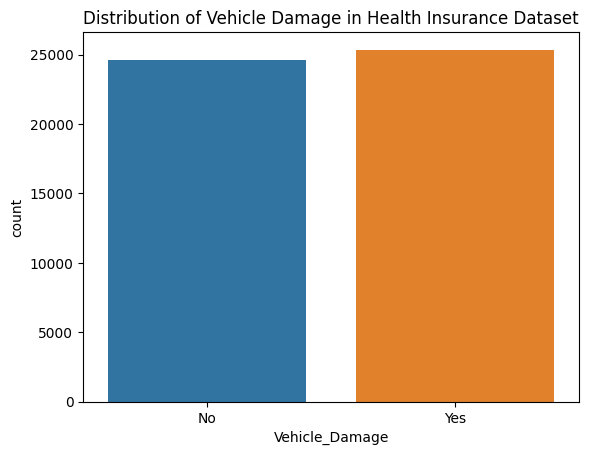

In [82]:
# Visualizing the distribution of the 'Vehicle_Damage' variable
veh_dmg_ax = sns.countplot(x='Vehicle_Damage', data=data)
plt.title("Distribution of Vehicle Damage in Health Insurance Dataset")
plt.xticks([0, 1], ['No', 'Yes'])  # Setting custom labels for clarity
plt.show()


The visualization portrays the distribution of responses based on whether vehicle damage exists or not. Understanding this relationship is crucial for evaluating how the presence or absence of vehicle damage might influence the response class, providing insights for health insurance cross-selling predictions.

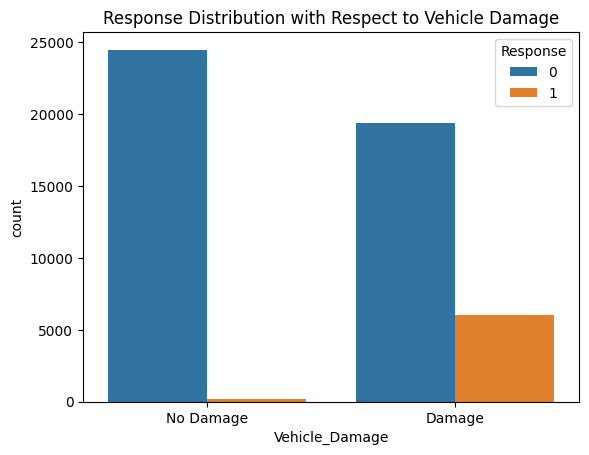

In [83]:
# Analyzing the 'Response' variable with respect to 'Vehicle_Damage'
dmg_vs_resp_ax = sns.countplot(x='Vehicle_Damage', hue='Response', data=data)
plt.title("Response Distribution with Respect to Vehicle Damage")
plt.xticks([0, 1], ['No Damage', 'Damage'])  # Setting custom labels for clarity
plt.show()


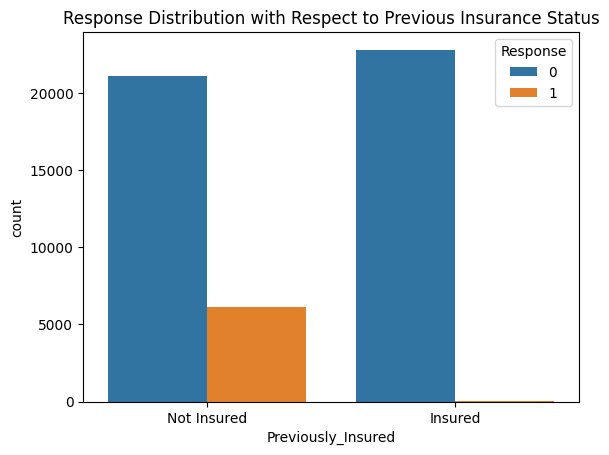

In [84]:
# Exploring the relationship between 'Response' and 'Previously_Insured'
prev_ins_ax = sns.countplot(x='Previously_Insured', hue='Response', data=data)
plt.title("Response Distribution with Respect to Previous Insurance Status")
plt.xticks([0, 1], ['Not Insured', 'Insured'])  # Setting custom labels for clarity
plt.show()


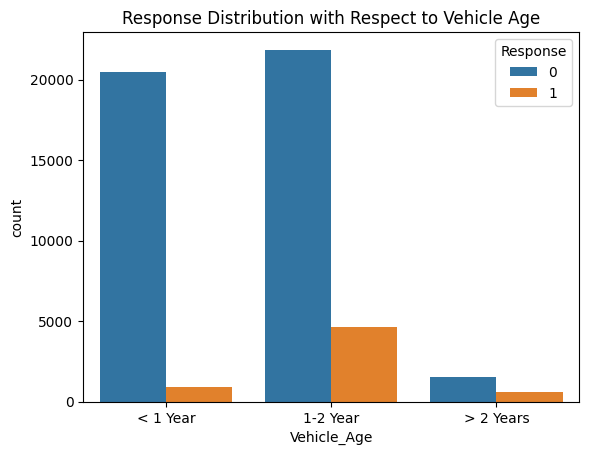

In [85]:
# Analyzing the relationship between 'Response' and 'Vehicle_Age'
veh_age_ax = sns.countplot(x='Vehicle_Age', hue='Response', data=data)
plt.title("Response Distribution with Respect to Vehicle Age")
plt.xticks([0, 1, 2], ['< 1 Year', '1-2 Year', '> 2 Years'])  # Setting custom labels for clarity
plt.show()


# Module 4
## Data Preparation for Model Training

In [86]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separating features and target variable
X = data.drop('Response', axis=1)
y = data['Response']

# Applying SMOTE for class balancing
smote = SMOTE(random_state=4)
X_res, y_res = smote.fit_resample(X, y)

# Splitting the resampled data into training and validation sets (80:20 ratio)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_res, y_res, test_size=0.20, random_state=4)

# Checking the shapes of the training and validation sets
(X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape)


((70171, 10), (17543, 10), (70171,), (17543,))

In [87]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Training the Extra Trees Classifier model
extra_trees_model = ExtraTreesClassifier(random_state=4)
extra_trees_model.fit(X_train, Y_train)

# Making predictions on the validation set
Y_pred = extra_trees_model.predict(X_validation)

# Calculating evaluation metrics
accuracy = accuracy_score(Y_validation, Y_pred)
precision = precision_score(Y_validation, Y_pred)
recall = recall_score(Y_validation, Y_pred)
f1 = f1_score(Y_validation, Y_pred)

print("Accuracy of the model is:", accuracy)
print("Precision of the model is:", precision)
print("Recall of the model is:", recall)
print("F1-Score of the model is:", f1)

Accuracy of the model is: 0.8838853103802087
Precision of the model is: 0.8510350566940601
Recall of the model is: 0.9311404507170499
F1-Score of the model is: 0.8892874612750693


In [88]:
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ignoring FutureWarning globally
warnings.simplefilter(action='ignore', category=FutureWarning)

# Creating the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Training the KNN model
knn_model.fit(X_train, Y_train)

# Making predictions on the validation set
Y_pred_knn = knn_model.predict(X_validation)

# Calculating evaluation metrics for the KNN model
accuracy_knn = accuracy_score(Y_validation, Y_pred_knn)
precision_knn = precision_score(Y_validation, Y_pred_knn)
recall_knn = recall_score(Y_validation, Y_pred_knn)
f1_knn = f1_score(Y_validation, Y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)


Accuracy: 0.8158239753747933
Precision: 0.7513802154041089
Recall: 0.9449123605736399
F1 Score: 0.8371061255356693


In [89]:
from sklearn.tree import DecisionTreeClassifier

# Creating the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=4)

# Training the Decision Tree model
decision_tree_model.fit(X_train, Y_train)

# Making predictions on the validation set
Y_pred_dt = decision_tree_model.predict(X_validation)

# Calculating evaluation metrics for the Decision Tree model
accuracy_dt = accuracy_score(Y_validation, Y_pred_dt)
precision_dt = precision_score(Y_validation, Y_pred_dt)
recall_dt = recall_score(Y_validation, Y_pred_dt)
f1_dt = f1_score(Y_validation, Y_pred_dt)

print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)



Accuracy: 0.8679245283018868
Precision: 0.8611142123478843
Recall: 0.8778738902799909
F1 Score: 0.8694132897480696


In [90]:
from sklearn.naive_bayes import GaussianNB

# Initializing and training the Gaussian Naive Bayes model
gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train, Y_train)

# Making predictions on the validation set
Y_pred_gnb = gaussian_nb_model.predict(X_validation)

# Calculating evaluation metrics for the Gaussian Naive Bayes model
accuracy_gnb = accuracy_score(Y_validation, Y_pred_gnb)
precision_gnb = precision_score(Y_validation, Y_pred_gnb)
recall_gnb = recall_score(Y_validation, Y_pred_gnb)
f1_gnb = f1_score(Y_validation, Y_pred_gnb)

print("Accuracy of the model is:", accuracy_gnb)
print("Precision of the model is:", precision_gnb)
print("Recall of the model is:", recall_gnb)
print("F1-Score of the model is:", f1_gnb)


Accuracy of the model is: 0.7857835033916661
Precision of the model is: 0.7302197802197802
Recall of the model is: 0.9075802412929661
F1-Score of the model is: 0.8092966609154573


In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initializing and training the Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, Y_train)

# Making predictions on the validation set
Y_pred_lda = lda_model.predict(X_validation)

# Calculating evaluation metrics for the Linear Discriminant Analysis model
accuracy_lda = accuracy_score(Y_validation, Y_pred_lda)
precision_lda = precision_score(Y_validation, Y_pred_lda)
recall_lda = recall_score(Y_validation, Y_pred_lda)
f1_lda = f1_score(Y_validation, Y_pred_lda)

print("Accuracy of the model is:", accuracy_lda)
print("Precision of the model is:", precision_lda)
print("Recall of the model is:", recall_lda)
print("F1-Score of the model is:", f1_lda)


Accuracy of the model is: 0.7694807045545232
Precision of the model is: 0.6953691496374423
Recall of the model is: 0.960505349419531
F1-Score of the model is: 0.8067106395182105


In [92]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest Classifier model with specified parameters
random_forest_model = RandomForestClassifier(n_estimators=100, max_features=3, random_state=4)

# Training the Random Forest Classifier model
random_forest_model.fit(X_train, Y_train)

# Making predictions on the validation set
Y_pred_rf = random_forest_model.predict(X_validation)

# Calculating evaluation metrics for the Random Forest Classifier model
accuracy_rf = accuracy_score(Y_validation, Y_pred_rf)
precision_rf = precision_score(Y_validation, Y_pred_rf)
recall_rf = recall_score(Y_validation, Y_pred_rf)
f1_rf = f1_score(Y_validation, Y_pred_rf)

print("Accuracy of the model is:", accuracy_rf)
print("Precision of the model is:", precision_rf)
print("Recall of the model is:", recall_rf)
print("F1-Score of the model is:", f1_rf)


Accuracy of the model is: 0.8956278857664025
Precision of the model is: 0.8758240570625743
Recall of the model is: 0.922376508081038
F1-Score of the model is: 0.8984976994290148


In [93]:
import pandas as pd

# Creating a DataFrame to display the metrics of all the models
model_metrics = {
    "Model": [
        "Random Forest Classifier", 
        "Linear Discriminant Analysis", 
        "Gaussian NB", 
        "Decision Tree Classifier", 
        "KNeighbors Classifier", 
        "Extra Trees Classifier"
    ],
    "Accuracy": [
        0.8956278857664025, 
        0.7694807045545232, 
        0.7857835033916661, 
        0.8679245283018868, 
        0.8158239753747933, 
        0.8838853103802087
    ],
    "Precision": [
        0.8758240570625743, 
        0.6953691496374423, 
        0.7302197802197802, 
        0.8611142123478843, 
        0.7513802154041089, 
        0.8510350566940601
    ],
    "Recall": [
        0.922376508081038, 
        0.960505349419531, 
        0.9075802412929661, 
        0.8778738902799909, 
        0.9449123605736399, 
        0.9311404507170499
    ],
    "F1 Score": [
        0.8984976994290148, 
        0.8067106395182105, 
        0.8092966609154573, 
        0.8694132897480696, 
        0.8371061255356693, 
        0.8892874612750693
    ]
}

metrics_df = pd.DataFrame(model_metrics)
metrics_df.set_index("Model", inplace=True)

# Formatting the DataFrame to display the metrics with only 3 decimal places
metrics_df_rounded = metrics_df.round(3)
metrics_df_rounded


,Accuracy,Precision,Recall,F1 Score
Model,,,,
Random Forest Classifier,0.896,0.876,0.922,0.898
Linear Discriminant Analysis,0.769,0.695,0.961,0.807
Gaussian NB,0.786,0.730,0.908,0.809
Decision Tree Classifier,0.868,0.861,0.878,0.869
KNeighbors Classifier,0.816,0.751,0.945,0.837
Extra Trees Classifier,0.884,0.851,0.931,0.889


In [96]:
# Formatting the evaluation output for better readability
accuracy_formatted = f"Accuracy: {accuracy_best_model:.2%}"
confusion_matrix_formatted = (
    f"Confusion Matrix:\n"
    f"- True Negatives (TN): {confusion_matrix_best_model[0][0]}\n"
    f"- False Positives (FP): {confusion_matrix_best_model[0][1]}\n"
    f"- False Negatives (FN): {confusion_matrix_best_model[1][0]}\n"
    f"- True Positives (TP): {confusion_matrix_best_model[1][1]}"
)
classification_report_formatted = f"Classification Report:\n{classification_report_best_model}"

print(accuracy_formatted)
print(confusion_matrix_formatted)
print(classification_report_formatted)


Accuracy: 89.56%
Confusion Matrix:
- True Negatives (TN): 7608
- False Positives (FP): 1149
- False Negatives (FN): 682
- True Positives (TP): 8104
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      8757
           1       0.88      0.92      0.90      8786

    accuracy                           0.90     17543
   macro avg       0.90      0.90      0.90     17543
weighted avg       0.90      0.90      0.90     17543



In [95]:
sample_data = pd.DataFrame([[1, 44, 1, 28.0, 0, 3, 1, 40454.0, 26.0, 217]],
                     columns=['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
                              'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'])

# Assuming sample_data is a DataFrame with the necessary features
prediction = best_model.predict(sample_data)

# Output the prediction
print("Prediction for the provided sample data:", prediction)


Prediction for the provided sample data: [1]
